In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## !git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import sys
print(sys.executable)

C:\Users\Phyo Min Khant\anaconda3\Anaconda3\python.exe


In [5]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0


In [6]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-55.215195, shape=(), dtype=float32)


In [7]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
from tensorflow.keras.preprocessing.image import load_img

In [9]:
path = './clothing-dataset-small/train/hat'
name = '1aac00cd-b42a-40f1-a82a-dcc44a0879d4.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [13]:
X = np.array([x])
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 [==============================] - 9s 9s/step


In [15]:
decode_predictions(pred)

[[('n02869837', 'bonnet', 0.20651299),
  ('n04599235', 'wool', 0.17120962),
  ('n04254777', 'sock', 0.035498176),
  ('n03188531', 'diaper', 0.030367315),
  ('n03775071', 'mitten', 0.02936845)]]

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [21]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [22]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 28s 234ms/step - loss: 1.2991 - accuracy: 0.6584 - val_loss: 0.8725 - val_accuracy: 0.7390
Epoch 2/10
96/96 [==============================] - 18s 190ms/step - loss: 0.5298 - accuracy: 0.8224 - val_loss: 0.7954 - val_accuracy: 0.7830
Epoch 3/10
96/96 [==============================] - 18s 186ms/step - loss: 0.3425 - accuracy: 0.8797 - val_loss: 0.8501 - val_accuracy: 0.7683
Epoch 4/10
96/96 [==============================] - 18s 184ms/step - loss: 0.2379 - accuracy: 0.9143 - val_loss: 0.8491 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 17s 181ms/step - loss: 0.2038 - accuracy: 0.9280 - val_loss: 1.0390 - val_accuracy: 0.7859
Epoch 6/10
96/96 [==============================] - 18s 185ms/step - loss: 0.1651 - accuracy: 0.9404 - val_loss: 0.8205 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 18s 184ms/step - loss: 0.1022 - accuracy: 0.9661 - val_loss: 0.9598 - val_accuracy: 0.7830

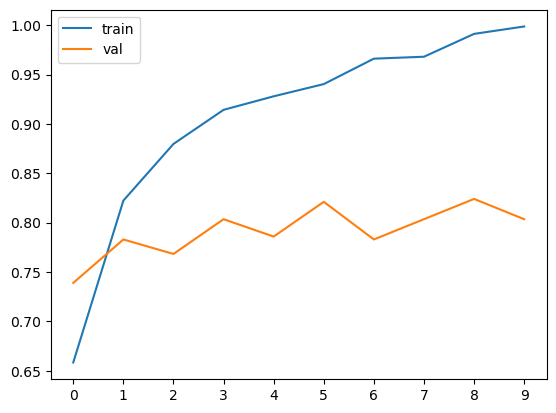

In [24]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [27]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ###########################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    outputs = keras.layers.Dense(10)(vectors)
    
    model = keras.Model(inputs, outputs)

    ###########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [29]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 25s 214ms/step - loss: 1.9546 - accuracy: 0.3406 - val_loss: 1.6204 - val_accuracy: 0.4809
Epoch 2/10
96/96 [==============================] - 17s 180ms/step - loss: 1.4042 - accuracy: 0.5561 - val_loss: 1.2728 - val_accuracy: 0.6070
Epoch 3/10
96/96 [==============================] - 17s 181ms/step - loss: 1.1586 - accuracy: 0.6375 - val_loss: 1.0847 - val_accuracy: 0.6569
Epoch 4/10
96/96 [==============================] - 18s 192ms/step - loss: 1.0166 - accuracy: 0.6829 - val_loss: 0.9677 - val_accuracy: 0.7009
Epoch 5/10
96/96 [==============================] - 18s 189ms/step - loss: 0.9213 - accuracy: 0.7109 - val_loss: 0.8944 - val_accuracy: 0.7009
Epoch 6/10
96/96 [==============================] - 18s 185ms/step - loss: 0.8494 - accuracy: 0.7298 - val_loss: 0.8391 - val_accuracy: 0.7361
Epoch 7/10
96/96 [==============================] - 18s 184ms/step - loss: 0.7950 - accuracy: 0.7461 - val_loss: 0.7953 - val_accuracy:

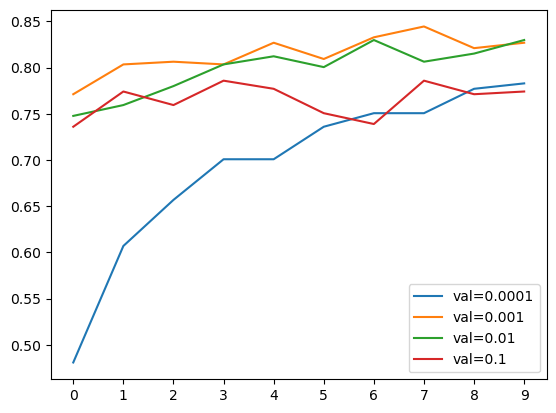

In [31]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

Python 3.9.18
